# TCC — MBA Analytics - Data Science

### Dados sobre Síndrome Respiratória Aguda Grave do DataSUS
### 2020 e 2021 (união)

## Importação do banco de dados
Em 2020 tivemos o início oficial da pandemia da COVID-19 no Brasil. A COVID-19 é uma doença que também causa SRAG, porém as circunstâncias são diferentes das de 2013 a 2018.

Em 2021 tivemos o início da vacinação contra a COVID-19 no Brasil. Apesar de ser tardia em comparação com os EUA e alguns países da Europa, tivemos o início da nossa vacinação em janeiro, o que modificou bastante o panorama da doença. Em abril, com a vacinação ainda muito lenta, tivemos um pico de [4249 mortes em 8 de abril](https://www.poder360.com.br/coronavirus/pico-da-pandemia-em-2021-teve-mais-que-o-dobro-de-mortes-que-a-alta-em-2020/).

Hoje, com a vacinação mais avançada, a média móvel de mortes está na casa dos [500 óbitos por dia](https://www.uol.com.br/vivabem/noticias/redacao/2021/09/16/covid-19-coronavirus-casos-mortes-16-de-setembro.htm).

O dataset disponibilizado pelo DataSUS é atualizado semanalmente com novos dados. Vou fazer o tratamento em um deles e, em um ponto futuro, irei baixar o mais atualizado e aplicar as transformações.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_2020 = pd.read_csv('INFLUD-29-11-2021.csv', sep=';', low_memory = False, encoding="ISO-8859-1")
df_2021 = pd.read_csv('INFLUD21-29-11-2021.csv', sep=';', low_memory = False, encoding="ISO-8859-1")

In [3]:
df_2020.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,07/01/2020,2,03/01/2020,1,DF,NaN,NaN,BRASILIA,530010,HRT HOSPITAL REGIONAL DE TAGUATINGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/01/2020,2,07/01/2020,2,DF,NaN,NaN,BRASILIA,530010,HOSPITAL MATERNO INFANTIL DR ANTONIO LISBOA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13/02/2020,7,08/02/2020,6,SP,GVE XXXI SOROCABA,1353.0,SALTO,354520,HOSPITAL E MATERNIDADE MUNICIPAL N S DO MONTE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27/01/2020,5,26/01/2020,5,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HIAS HOSPITAL INFANTIL ALBERT SABIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/01/2020,3,10/01/2020,2,SP,GVE XXXIII TAUBATE,1352.0,TAUBATE,355410,HOSPITAL REGIONAL DO VALE DO PARAIBA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_2021.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,05/01/2021,1,03/01/2021,1,PR,09RS FOZ DO IGUACU,1363.0,MATELANDIA,411560,HOSPITAL E MATERNIDADE PADRE TEZZA,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0
1,07/01/2021,1,04/01/2021,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSP STA CRUZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08/01/2021,1,05/01/2021,1,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL DAS CLINICAS DA UNICAMP DE CAMPINAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/01/2021,2,09/01/2021,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,COMPLEXO HOSPITAL DE CLINICAS,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
4,09/01/2021,1,07/01/2021,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,ITAQUAQUECETUBA,352310,HOSPITAL GERAL DE ITAQUAQUECETUBA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2020.shape, df_2021.shape

((1199699, 154), (1625471, 162))

## Diferenças do banco de 2021 para o banco de 2020

Para analisar a diferença, irei comparar as colunas do banco de 2021 com as colunas do banco de 2020.

In [6]:
colunas_diferentes = []

for i in df_2021.columns:
    if i not in df_2020.columns:
        colunas_diferentes.append(i)
        
colunas_diferentes

['ESTRANG',
 'VACINA_COV',
 'DOSE_1_COV',
 'DOSE_2_COV',
 'LAB_PR_COV',
 'LOTE_1_COV',
 'LOTE_2_COV',
 'FNT_IN_COV']

Temos apenas as colunas de vacina COVID 19 e se o paciente é estrangeiro

### Teste das variáveis:

In [7]:
df_2021.ESTRANG.value_counts(dropna=False)

2.0    1146596
NaN     471037
1.0       7838
Name: ESTRANG, dtype: int64

In [8]:
df_2021.VACINA_COV.value_counts(dropna=False)

2.0    531033
NaN    516800
1.0    310068
9.0    267570
Name: VACINA_COV, dtype: int64

In [9]:
df_2021.DOSE_1_COV.value_counts(dropna=False)

NaN           1353655
23/03/2021       5684
26/03/2021       4925
25/03/2021       4637
24/03/2021       4510
               ...   
07/03/2011          1
14/04/2015          1
24/07/2019          1
21/04/0221          1
28/02/2020          1
Name: DOSE_1_COV, Length: 517, dtype: int64

In [10]:
df_2021.DOSE_2_COV.value_counts(dropna=False)

NaN           1465349
20/04/2021       3339
16/04/2021       3160
19/04/2021       3136
22/04/2021       3046
               ...   
28/04/1900          1
20/12/2020          1
08/04/7202          1
20/10/2020          1
10/04/2013          1
Name: DOSE_2_COV, Length: 472, dtype: int64

In [11]:
df_2021.LAB_PR_COV.value_counts(dropna=False)

NaN                                              1352907
CORONAVAC                                          39163
BUTANTAN                                           27262
86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC         26779
ASTRAZENECA                                        23465
                                                  ...   
JANSEN JULHO                                           1
CORONAVAC, NAO SABE DATA QUE TOMOU AS 2 DOSES          1
1 DOSE FPFIZZER                                        1
NAO HA REGISTRO EM ESF.                                1
1 DOSE, NAO ESPECIFICADO                               1
Name: LAB_PR_COV, Length: 5525, dtype: int64

In [12]:
df_2021.LOTE_1_COV.value_counts(dropna=False)

NaN           1433877
4120Z005         4205
4120Z026         3596
4120Z001         2719
210071           2488
               ...   
215vcd115w          1
duartina            1
4102Z025            1
214VED089W          1
213V6D030Z          1
Name: LOTE_1_COV, Length: 8220, dtype: int64

In [13]:
df_2021.LOTE_2_COV.value_counts(dropna=False)

NaN           1502539
210130           1913
210048           1571
210114           1566
210146           1440
               ...   
210040,             1
218VCD2467          1
214vc80             1
214vcd0802          1
213vc0017w          1
Name: LOTE_2_COV, Length: 4379, dtype: int64

In [14]:
df_2021.FNT_IN_COV.value_counts(dropna=False)

1.0    1003650
NaN     516581
2.0     105240
Name: FNT_IN_COV, dtype: int64

## Seleção preliminar de colunas

A ideia agora é, através da documentação e do banco, achar as colunas que não servirão para a análise e eliminá-las do banco.
Um exemplo de colunas que podem ser eliminadas são os campos internos do SUS que, muitas vezes, não sabemos o significado.<br>
Algumas datas também são, ou redundantes, ou não relevantes para análise e podem ser eliminadas.<br>
Temos 162 colunas para análise

In [15]:
for i in df_2020.columns:
    print(i)

DT_NOTIFIC
SEM_NOT
DT_SIN_PRI
SEM_PRI
SG_UF_NOT
ID_REGIONA
CO_REGIONA
ID_MUNICIP
CO_MUN_NOT
ID_UNIDADE
CO_UNI_NOT
CS_SEXO
DT_NASC
NU_IDADE_N
TP_IDADE
COD_IDADE
CS_GESTANT
CS_RACA
CS_ETINIA
CS_ESCOL_N
ID_PAIS
CO_PAIS
SG_UF
ID_RG_RESI
CO_RG_RESI
ID_MN_RESI
CO_MUN_RES
CS_ZONA
SURTO_SG
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OBES_IMC
OUT_MORBI
MORB_DESC
VACINA
DT_UT_DOSE
MAE_VAC
DT_VAC_MAE
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
OUT_ANTIV
DT_ANTIVIR
HOSPITAL
DT_INTERNA
SG_UF_INTE
ID_RG_INTE
CO_RG_INTE
ID_MN_INTE
CO_MU_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
RAIOX_OUT
DT_RAIOX
AMOSTRA
DT_COLETA
TP_AMOSTRA
OUT_AMOST
PCR_RESUL
DT_PCR
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
FLUASU_OUT
PCR_FLUBLI
FLUBLI_OUT
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_M

In [16]:
for i in df_2021.columns:
    print(i)

DT_NOTIFIC
SEM_NOT
DT_SIN_PRI
SEM_PRI
SG_UF_NOT
ID_REGIONA
CO_REGIONA
ID_MUNICIP
CO_MUN_NOT
ID_UNIDADE
CO_UNI_NOT
CS_SEXO
DT_NASC
NU_IDADE_N
TP_IDADE
COD_IDADE
CS_GESTANT
CS_RACA
CS_ETINIA
CS_ESCOL_N
ID_PAIS
CO_PAIS
SG_UF
ID_RG_RESI
CO_RG_RESI
ID_MN_RESI
CO_MUN_RES
CS_ZONA
SURTO_SG
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OBES_IMC
OUT_MORBI
MORB_DESC
VACINA
DT_UT_DOSE
MAE_VAC
DT_VAC_MAE
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
OUT_ANTIV
DT_ANTIVIR
HOSPITAL
DT_INTERNA
SG_UF_INTE
ID_RG_INTE
CO_RG_INTE
ID_MN_INTE
CO_MU_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
RAIOX_OUT
DT_RAIOX
AMOSTRA
DT_COLETA
TP_AMOSTRA
OUT_AMOST
PCR_RESUL
DT_PCR
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
FLUASU_OUT
PCR_FLUBLI
FLUBLI_OUT
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_M

In [17]:
pd.set_option('display.max_rows', None)
df_2020.isnull().sum()

DT_NOTIFIC          0
SEM_NOT             0
DT_SIN_PRI          0
SEM_PRI             0
SG_UF_NOT           0
ID_REGIONA     161607
CO_REGIONA     161607
ID_MUNICIP          0
CO_MUN_NOT          0
ID_UNIDADE          0
CO_UNI_NOT          0
CS_SEXO             0
DT_NASC          2243
NU_IDADE_N          0
TP_IDADE            0
COD_IDADE           0
CS_GESTANT          0
CS_RACA         49335
CS_ETINIA     1197052
CS_ESCOL_N     359870
ID_PAIS             0
CO_PAIS             0
SG_UF             114
ID_RG_RESI     159278
CO_RG_RESI     159278
ID_MN_RESI        114
CO_MUN_RES        114
CS_ZONA        128961
SURTO_SG       316562
NOSOCOMIAL     252695
AVE_SUINO      216787
FEBRE          157972
TOSSE          133197
GARGANTA       296482
DISPNEIA       134144
DESC_RESP      196692
SATURACAO      190175
DIARREIA       309297
VOMITO         320616
OUTRO_SIN      311196
OUTRO_DES      823696
PUERPERA       716177
FATOR_RISC          0
CARDIOPATI     578246
HEMATOLOGI     712450
SIND_DOWN 

In [18]:
df_2021.isnull().sum()

DT_NOTIFIC          0
SEM_NOT             0
DT_SIN_PRI          0
SEM_PRI             0
SG_UF_NOT           0
ID_REGIONA     171634
CO_REGIONA     171634
ID_MUNICIP          0
CO_MUN_NOT          0
ID_UNIDADE          0
CO_UNI_NOT          0
CS_SEXO             0
DT_NASC          1094
NU_IDADE_N          0
TP_IDADE            0
COD_IDADE           0
CS_GESTANT          0
CS_RACA             0
CS_ETINIA     1524501
CS_ESCOL_N     541064
ID_PAIS             0
CO_PAIS             0
SG_UF             224
ID_RG_RESI     168897
CO_RG_RESI     168897
ID_MN_RESI        224
CO_MUN_RES        224
CS_ZONA        177451
SURTO_SG      1361344
NOSOCOMIAL     276722
AVE_SUINO      292430
FEBRE          276266
TOSSE          211493
GARGANTA       476632
DISPNEIA       197245
DESC_RESP      306686
SATURACAO      249827
DIARREIA       493896
VOMITO         511422
OUTRO_SIN      476685
OUTRO_DES     1058535
PUERPERA      1018601
FATOR_RISC          0
CARDIOPATI     855659
HEMATOLOGI    1018478
SIND_DOWN 

In [19]:
pd.reset_option('display.max_rows')

Observa-se muitos valores nulos em algumas colunas, alguns são triviais de resolver e outros não. O banco necessita de um tratamento individualizado para cada categoria

### Concatenação dos bancos de dados

In [15]:
df = pd.concat([df_2020, df_2021]).reset_index(drop = True).copy()
df

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,07/01/2020,2,03/01/2020,1,DF,NaN,NaN,BRASILIA,530010,HRT HOSPITAL REGIONAL DE TAGUATINGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/01/2020,2,07/01/2020,2,DF,NaN,NaN,BRASILIA,530010,HOSPITAL MATERNO INFANTIL DR ANTONIO LISBOA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13/02/2020,7,08/02/2020,6,SP,GVE XXXI SOROCABA,1353.0,SALTO,354520,HOSPITAL E MATERNIDADE MUNICIPAL N S DO MONTE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27/01/2020,5,26/01/2020,5,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HIAS HOSPITAL INFANTIL ALBERT SABIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/01/2020,3,10/01/2020,2,SP,GVE XXXIII TAUBATE,1352.0,TAUBATE,355410,HOSPITAL REGIONAL DO VALE DO PARAIBA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825165,26/11/2021,47,21/11/2021,47,BA,NUCLEO REGIONAL DE SAUDE CENTRO-LESTE,1381.0,FEIRA DE SANTANA,291080,HOSPITAL ESTADUAL DA CRIANCA,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
2825166,10/06/2021,23,02/04/2021,13,PE,001,1497.0,RECIFE,261160,HOSPITAL ILHA DO LEITE,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,1.0
2825167,19/11/2021,46,15/11/2021,46,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL ESTADUAL DE VILA ALPINA ORG SOCIAL SE...,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
2825168,14/11/2021,46,04/11/2021,44,SC,BLUMENAU,1564.0,BLUMENAU,420240,HOSPITAL SANTO ANTONIO,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0


In [16]:
del df_2020, df_2021

### Campos de DATA
As datas que serão consideradas na análise, juntamente com suas justificativas, são:
* `DT_NOTIFIC` **Data da notificação** - Importante para determinarmos treino e teste;
* `DT_SIN_PRI` **Data dos primeiros sintomas** - Utilizada para verificar em quanto tempo o paciente se recuperou ou em quanto tempo foi a óbito;
* `DT_EVOLUCA` **Data da alta ou do óbito** - Utilizada para calcular em quanto tempo o paciente faleceu, ou em quanto tempo teve alta;
* `DT_ENCERRA` **Data do encerramento da investigação** - Caso a data de óbito ou alta esteja vazia, DT_Encerra será utilizada;
* `DT_ENTUTI` **Data da entrada na UTI** - Utilizada para calcular quanto tempo o paciente permaneceu na UTI;
* `DT_SAIDUTI` **Data da saída da UTI** - Utilizada para calcular quanto tempo o paciente permaneceu na UTI.

No caso das datas, os campos que NÃO serão considerados na a análise, juntamente com suas justificativas são:
* `DT_DIGITA` **Data de inclusão do caso no sistema** - Não é necessário para a análise
* `DT_NASC` **Data de nascimento** - Como já há um campo de idade (NU_IDADE_N), a data de nascimento não se faz necessária;
* `DT_NOTIFIC` **Data da notificação** - O que nos interessa é a data dos primeiros sintomas (DT_SIN_PRI);
* `DT_INTERNA` **Data da internação** - Temos uma variável "UTI" que já nos diz se o paciente foi internado ou não;
* `DT_RAIOX` **Data do Raio X de Tórax** - A realização de um Raio X não é nem um sintoma e nem um agravante da doença, logo não é necessário para a análise;
* `DT_COLETA` **Data da coleta da amostra para teste diagnóstico**  - Não faz diferença na análise;
* `DT_ANTIVIR` **Data do início do tratamento com antiviral** - Temos uma variável que indica se foi feito tratamento com antiviral. A data não nos interessa;
* `DT_PCR` **Data do resultado diagnóstico do PCR** - Não nos interessa qual diagnóstico foi utilizado;
* `DT_UT_DOSE` **Data da última dose de vacina contra gripe que o paciente tomou.** - Como já há uma variável de vacina, a data da dose não nos interessa;
* `DT_DOSEUNI` **Se >= 6 meses e <= 8 anos, data da dose única para crianças vacinadas em campanhas de anos anteriores** - Apenas nos interessa se foi vacinado e não a data. Há uma variável para isso;
* `DT_1_DOSE` **Se >= 6 meses e <= 8 anos, data da 1ª dose para crianças vacinadas pela primeira vez** - Apenas nos interessa se foi vacinado e não a data. Há uma variável para isso;
* `DT_2_DOSE` **Se >= 6 meses e <= 8 anos data da 2ª dose para crianças vacinadas pela primeira vez** - Apenas nos interessa se foi vacinado e não a data. Há uma variável para isso;
* `DT_ANTIVIR` **Data em que foi iniciado o tratamento com o antiviral.** - Nos interessa se houve tratamento, não a data de início;
* `DT_VGM` **Data em que foi realizada a viagem para o exterior** - Nos interessa apenas se houve viagem para o exterior, não a data;
* `DT_RT_VGM` **Data em que retornou de viagem do exterior** - Nos interessa apenas se houve viagem para o exterior, não a data;
* `DT_VAC_MAE` **Data da vacina da mãe** - Não nos interessa a data;
* `DT_TOMO` **Se realizou tomografia, especificar a data do exame.** - Não nos interessa a data do exame e nem se fez o exame;
* `DT_RES_AN` **Data do resultado do teste antigênico.** - A data do resultado não é útil para a análise;
* `DT_CO_SOR` **Data da coleta do material para diagnóstico por Sorologia.** - A data da coleta não é útil para a análise;
* `DT_RES` **Data do Resultado do Teste Sorológico** - A data não é útil para a análise;
* `SEM_NOT` **Semana epidemiológica em que o caso foi notificado** - Não faz diferença para a análise;
* `SEM_PRI` **Semana epidemiológica do início dos sintomas** - Não faz diferença para a análise.

In [17]:
datas = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_ENTUTI', 'DT_SAIDUTI']

datas_drop = ['DT_DIGITA', 'DT_NASC', 'DT_INTERNA', 'DT_RAIOX', 'DT_COLETA', 'DT_ANTIVIR', 'DT_PCR', 
              'DT_UT_DOSE', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'DT_ANTIVIR', 'DT_VGM', 'DT_RT_VGM', 'DT_TOMO',
              'DT_RES_AN', 'DT_CO_SOR', 'DT_RES', 'SEM_NOT', 'SEM_PRI']

len(datas), len(datas_drop)

(6, 20)

### Campos de SINTOMAS
Os sintomas que serão considerados na análise serão os principais, sinalizados como sim ou não no BD, eles são:
* `FEBRE`
* `TOSSE`
* `DISPNEIA`
* `DIARREIA`
* `VOMITO`
* `GARGANTA` **Dor de garganta**
* `DESC_RESP` **Desconforto respiratório**
* `SATURACAO` **Saturação de oxigênio abaixo de 95%**
* `DOR_ABD` **Dor abdominal**
* `FADIGA`
* `PERD_OLFT` **Perda olfativa**
* `PERD_PALA` **Perda de paladar**


Os sintomas que não serão considerados são os descritos como "Outros", já que devem ser especificados manualmente pelo médico responsável, eles são:
* `OUTRO_SIN` **Se o paciente possui outros sintomas**
* `OUTRO_DES` **Descrição dos outros sintomas (escrito manualmente)**


É possível observar que não há mais MIALGIA e adicionaram-se alguns outros sintomas

In [18]:
sintomas = ['FEBRE', 'TOSSE', 'DISPNEIA', 'DIARREIA', 'VOMITO', 'GARGANTA', 'DESC_RESP', 'SATURACAO', 'DOR_ABD', 
            'FADIGA', 'PERD_OLFT', 'PERD_PALA']
sintomas_drop = ['OUTRO_DES', 'OUTRO_SIN']

len(sintomas), len(sintomas_drop)

(12, 2)

### Campos de FATORES DE RISCO
Análogo aos sintomas, serão considerados todos os fatores de risco exceto os "Outros", eles são:

* `HEMATOLOGI` **Condição hematológica** - As doenças hematológicas são aquelas que comprometem a produção dos componentes do sangue, como as hemácias (glóbulos vermelhos), os leucócitos (glóbulos brancos) e as plaquetas, geradas na medula óssea. Essas complicações variam entre anemias, linfomas, leucemias e mielomas, podendo ser benignas ou malignas. [Fonte](https://www.h9j.com.br/pt/sobre-nos/blog/doencas-hematologicas-e-seus-principais-tratamentos)
* `CARDIOPATI` **Cardiopatia crônica associada**
* `ASMA` **Paciente com asma crônica**
* `DIABETES` **Paciente com diabetes**
* `PNEUMOPATI` **Pneumopatia crônica associada**
* `RENAL` **Doença renal crônica associada**
* `IMUNODEPRE` **Imunodepressão associada**
* `METABOLICA` **Doença metabólica crônica associada**
* `HEPATICA` **Doença hepática crônica associada**
* `NEUROLOGIC` **Doença neurológica crônica associada**
* `OBESIDADE` **Obesidade**
* `PUERPERA` **Mulher puérpera** - Que acabou de dar a luz
* `SIND_DOWN` **Síndrome de down**
* `OUT_MORBI` **Se o paciente possui outras morbidades**

Não serão considerados:
* `FATOR_RISC` **Paciente apresenta algum fator de risco** - Variável redundante
* `MORB_DESC` **Descrição das outras morbidades**
* `OBES_IMC` **IMC do paciente obeso** - Foi removido no banco de 2013 por ter muitos valores faltantes.

In [19]:
morbidades = ['HEMATOLOGI', 'CARDIOPATI', 'ASMA', 'DIABETES', 'PNEUMOPATI', 'RENAL', 'IMUNODEPRE', 
              'HEPATICA', 'NEUROLOGIC', 'OBESIDADE', 'PUERPERA', 'SIND_DOWN']

morbi_drop = ['MORB_DESC', 'OBES_IMC', 'OUT_MORBI', 'FATOR_RISC']

len(morbidades), len(morbi_drop)

(12, 4)

### Campos DEMOGRÁFICOS
Dos campos demográficos, serão considerados:
* `SG_UF_NOT` **Código UF da unidade de saúde** - Podemos verificar qual UF possui mais casos e se há alguma correlação com os casos de SRAG. Não irei utilizar UF do paciente pois nem sempre indica a localização da pessoa;
* `NU_IDADE_N` **Idade do paciente** - Verificar se há correlação entre idade e óbito;
* `TP_IDADE` **Indica se a idade é em dias, meses ou anos**
* `CS_SEXO` **Sexo do paciente** - Verificar se há alguma predisposição relacionada ao sexo do paciente;
* `CS_GESTANT` **Idade gestacional do paciente** - Verificar se há correlação entre tempo de gravidez e óbito;
* `CS_RACA` **Raça do paciente** - Verificar se há diferença de raça nos óbitos de SRAG;
* `M_AMAMENTA` **Se paciente < 6 meses, a mãe amamenta a criança?** - Verificar se o leite materno ajuda com a SRAG;
* `MAE_VAC`	**Se paciente < 6 meses, a mãe recebeu vacina?** - Vacina na mãe faz diferença?
* `VACINA` **Paciente foi vacinado contra gripe** - Verificar se a vacina da gripe ajuda a evitar óbitos no caso da SRAG.

Os que não serão considerados são:
* `ID_REGIONA` **Regional de Saúde onde está localizado o Município realizou a notificação.** - Não contribui para a análise;
* `CO_REGIONA` **Regional de Saúde onde está localizado o Município realizou a notificação.** - Não contribui para a análise;
* `CO_MUN_NOT` **Município onde está localizada a Unidade Sentinela que realizou a notificação.** - Não contribui para a análise;
* `ID_UNIDADE` **Unidade Sentinela que realizou o atendimento, coleta de amostra e registro do caso.** - Não contribui para a análise;
* `CO_UNI_NOT` **Unidade Sentinela que realizou o atendimento, coleta de amostra e registro do caso.** - Não contribui para a análise;
* `CS_ETINIA` **Etnia do paciente quando indigena** - Não vou avaliar etnia indígena
* `CS_ESCOL_N` **Escolaridade do paciente** - Não contribui para a análise. Não irei analisar escolaridade;
* `ID_PAIS` **País de residência do paciente** - Não contribui para a análise;
* `CO_PAIS` **País de residência do paciente** - Não contribui para a análise;
* `ID_RG_RESI` **Regional de Saúde onde está localizado o Município de residência do paciente.** - Não contribui para a análise. Já temos o código da UF da unidade de saúde;
* `CO_RG_RESI` **Regional de Saúde onde está localizado o Município de residência do paciente.** - Não contribui para a análise;
* `CO_MUN_RES` **Município de residência do paciente.** - Não contribui para a análise;
* `CS_ZONA` **Zona geográfica do endereço de residência do paciente.** - Não contribui para a análise;
* `SG_UF_INTE` **Unidade Federativa de internação do paciente.** - Não contribui para a análise;
* `ID_RG_INTE` **Unidade Federativa de internação do paciente.** - Não contribui para a análise;
* `CO_RG_INTE` **Unidade Federativa de internação do paciente.** - Não contribui para a análise;
* `ID_MN_INTE` **Município onde está localizado a Unidade de Saúde onde o paciente internou.** - Não contribui para a análise;
* `CO_MU_INTE` **Código do município de internação** - Vou utilizar apenas a UF da notificação;
* `OUT_ANIM` **Informar o animal que o paciente teve contato se selecionado a opção 3.** - Não contribui para a análise;
* `PAC_COCBO` **Ocupação profissional do paciente** - Não contribui para a análise;
* `PAC_DSCBO` **Ocupação profissional do paciente** - Não contribui para a análise;
* `ID_MUNICIP` **Código do município da unidade de saúde que realizou a notificação** - Vou abordar apenas UF e não município; 
* `SG_UF` **Código da UF do paciente** - Como mencionado acima, nem sempre a UF do paciente indica sua localização. Na análise, focarei na localização;
* `ID_MN_RESI` **Código do município de residência do caso notificado** - Vou abordar apenas UF e não município;

In [20]:
demograficos = ['SG_UF_NOT', 'NU_IDADE_N', 'TP_IDADE', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'M_AMAMENTA', 'MAE_VAC', 'VACINA']

demog_drop = ['ID_REGIONA', 'CO_REGIONA', 'CO_MUN_NOT', 'ID_UNIDADE', 'CO_UNI_NOT', 'CS_ETINIA', 'CS_ESCOL_N', 'ID_PAIS', 
             'CO_PAIS', 'ID_RG_RESI', 'CO_RG_RESI', 'CO_MUN_RES', 'CS_ZONA', 'SG_UF_INTE', 'ID_RG_INTE', 'CO_RG_INTE',
             'ID_MN_INTE', 'CO_MU_INTE', 'OUT_ANIM', 'PAC_COCBO', 'PAC_DSCBO', 'ID_MUNICIP', 'SG_UF', 'ID_MN_RESI']

len(demograficos), len(demog_drop)

(9, 24)

### Campos de DOENÇA e DIAGNÓSTICO
Dos campos de doença e diagnóstico, serão utilizados:
* `EVOLUCAO` **Evolução do caso** - VARIÁVEL RESPOSTA! Indica se o paciente faleceu ou não;
* `CLASSI_FIN`**Diagnóstico final do caso suspeito** - Poderia ser utilizada para entender qual SRAG mais mata;
* `ANTIVIRAL` **Fez uso de antiviral para tratamento da doença** - Indica se o paciente utilizou antiviral para tratar a SRAG;
* `SUPORT_VEN` **Fez uso de suporte ventilatório** - Indica se o paciente fez;
* `UTI` **Internação em UTI** - Se o paciente foi internado em UTI;
* `HISTO_VGM` **Paciente tem histórico de viagem internacional até 14 dias antes do início dos sintomas?** - Bom para identificar se viagens são transmissores de vírus;
* `POS_PCRFLU` **Resultado da RT-PCR foi positivo para Influenza** - Indica se a pessoa teve Influenza;
* `TP_FLU_PCR` **Resultado diagnóstico do RT-PCR para o tipo de Influenza.** - Indica se o paciente teve influenza A ou B
* `POS_PCROUT`	**Resultado da RT-PCR foi positivo para outro vírus respiratório** - Que não sejam os testados abaixo;
* `PCR_VSR` **Resultado do diagnóstico para VSR** - Indica se o paciente teve vírus sincicial respiratório;
* `PCR_PARA1` **Diagnóstico Parainfluenza 1** - Indica se a pessoa teve Parainfluenza 1;
* `PCR_PARA2` **Diagnóstico Parainfluenza 2** - Indica se a pessoa teve Parainfluenza 2;
* `PCR_PARA3` **Diagnóstico Parainfluenza 3** - Indica se a pessoa teve Parainfluenza 3;
* `PCR_PARA4` **Diagnóstico Parainfluenza 4** - Indica se a pessoa teve Parainfluenza 4;
* `PCR_ADENO` **Resultado diagnóstico para Adenovirus** - Indica se a pessoa teve Adenovirus;
* `PCR_METAP` **Resultado diagnóstico do RT-PCR para Metapneumovírus.** - Indica se a pessoa teve Metapneumovírus;
* `PCR_BOCA` **Resultado diagnóstico do RT-PCR para Bocavírus.** - Indica se a pessoa teve Bocavírus;
* `PCR_RINO` **Resultado diagnóstico do RT-PCR para Rinovírus.** - Indica se a pessoa teve Rinovírus;
* `PCR_SARS2` **Resultado diagnóstico do RT-PCR para (SARS-CoV-2)** - Identifica se o paciente teve COVID-19;
* `RES_AN` **Resultado do Teste Antigênico** - Alternativa para identificação de COVID-19;
* `POS_AN_FLU` **Resultado do Teste Antigênico que foi positivo para Influenza** - Alternativa para identificação de Influenza;
* `TP_FLU_AN` **Resultado do Teste Antigênico, para o tipo de Influenza** - Alternativa para identificação do tipo de Influenza
* `POS_AN_OUT` **Resultado do Teste Antigênico, que foi positivo para outro vírus respiratório** - Alternativa para identificação de outro vírus respiratório;
* `AN_SARS2` **Resultado do Teste Antigênico, para SARS-CoV-2** - Alternativa para identificação de COVID-19;
* `AN_VSR` **Resultado do Teste Antigênico, para VSR** - Alternativa para identificação de VSR;
* `AN_PARA1` **Resultado do Teste Antigênico, para Parainfluenza 1** - Alternativa para identificação de Parainfluenza 1;
* `AN_PARA2` **Resultado do Teste Antigênico, para Parainfluenza 2** - Alternativa para identificação de Parainfluenza 2;
* `AN_PARA3` **Resultado do Teste Antigênico, para Parainfluenza 3** - Alternativa para identificação de Parainfluenza 3;
* `AN_ADENO` **Resultado do Teste Antigênico para Adenovírus** - Alternativa para identificação de Adenovírus;
* `AN_OUTRO` **Resultado do Teste Antigênico Outro vírus respiratório** - Alternativa para identificação de outro vírus respiratório;
* `RES_IGG` **Resultado da Sorologia para SARS-CoV-2** - Alternativa para identificação de COVID-19;
* `RES_IGM` **Resultado da Sorologia para SARS-CoV-2** - Alternativa para identificação de COVID-19;
* `RES_IGA` **Resultado da Sorologia para SARS-CoV-2** - Alternativa para identificação de COVID-19;

Os que não serão considerados são:
* `TP_ANTIVIR` **Tipo do antiviral** - Nos interessa apenas se o paciente fez ou não uso de antiviral;
* `OUT_ANTIV` **Antiviral além de Oseltamivir ou Zanamivir** - Nos interessa apenas se fez ou não uso de antiviral;
* `HOSPITAL` **Se o paciente foi hospitalizado em decorrência da influenza** - O que nos interessa é UTI, que já tem uma variável;
* `RAIOX_RES` **Se foi realizado um Raio X de Tórax** - Não faz diferença para a análise;
* `RAIOX_OUT` **Se o resultado do RX de tórax for igual a 5 (Outro)** - Não faz diferença para a análise;
* `AMOSTRA` **Coletou amostra clínica do paciente para diagnóstico laboratorial** - Interessa o diagnóstico apenas;
* `TP_AMOSTRA` **Tipo da amostra clínica coletada para o teste diagnóstico** - Nos interessa apenas o diagnóstico;
* `OUT_AMOST` **Descrição do tipo da amostra clínica** - Não faz diferença para a análise;
* `PCR_RESUL` **Resultado do teste de RT-PCR/outro método por Biologia Molecular** - Temos outras variáveis para identificar a doença;
* `AVE_SUINO` **Caso com contato direto com aves ou suínos** - Aparentemente aves e suínos podem causar problemas respiratórios, porém não é relevante para a análise;
* `SURTO_SG` **Caso proveniente de surto de síndrome gripal (SG)** - SG pré-aguda
* `PCR_FLUASU` **Subtipo para Influenza A.** - Não vou entrar no nível de detalhe dos tipos de Influenza;
* `FLUASU_OUT` **Outro subtipo para Influenza A.** - Não vou entrar no nível de detalhe dos tipos de Influenza;
* `PCR_FLUBLI` **Linhagem para Influenza B** - Não vou entrar no nível de detalhe dos tipos de Influenza;
* `FLUBLI_OUT` **Outra linhagem para Influenza B.** - Não vou entrar no nível de detalhe dos tipos de Influenza;
* `PCR_OUTRO` **Resultado diagnóstico do RT-PCR para Outro vírus respiratório.**
* `DS_PCR_OUT` **Nome do outro vírus respiratório identificado pelo RT-PCR.**
* `CLASSI_OUT` **Diagnóstico final do caso suspeito por outro agente etiológico** - Pode ser utilizado para identificar qual a doença, mas é um campo de escrita livre;
* `CRITERIO` **Critério de confirmação do diagnóstico** - Basta apenas o diagnóstico e não o critério de confirmação;
* `PAIS_VGM` **País onde foi realizada a viagem** - Campo majoritariamente vazio, não faz diferença na análise nessas condições;
* `CO_PS_VGM` **País onde foi realizada a viagem** - Campo majoritariamente vazio, não faz diferença na análise nessas condições;
* `NOSOCOMIAL` **Caso de SRAG com infecção adquirida após internação.** - SRAG é SRAG, vindo do hospital ou não;
* `LO_PS_VGM` **Local (cidade, estado, província e outros) onde foi realizada a viagem** - Campo majoritariamente vazio, não faz diferença na análise nessas condições;
* `TOMO_RES` **Resultado da tomografia** - Nos interessa o diagnóstico final;
* `TOMO_OUT` **Informar o resultado da tomografia** - Campo majoritariamente vazio;
* `TP_TES_AN` **Tipo do teste antigênico que foi realizado** - O tipo do teste não nos interessa;
* `DS_AN_OUT` **Nome do outro vírus respiratório identificado pelo Teste Antigênico** - Campo de escrita livre;
* `TP_AM_SOR` **Tipo de amostra sorológica que foi coletada** - O tipo da amostra não faz diferença;
* `SOR_OUT` **Descrição do tipo da amostra clínica, caso diferente das listadas na categoria um (1) do campo** - Não nos interessa;
* `TP_SOR` **Tipo do Teste Sorológico que foi realizado** - Não nos interessa;
* `OUT_SOR` **Descrição do tipo de Teste Sorológico** - Não nos interessa.

In [21]:
doediag = ['EVOLUCAO', 'CLASSI_FIN', 'ANTIVIRAL', 'SUPORT_VEN', 'UTI', 'HISTO_VGM', 
           'POS_PCRFLU', 'TP_FLU_PCR', 'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO',
           'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_SARS2', 'RES_AN', 'POS_AN_FLU', 'TP_FLU_AN', 'POS_AN_OUT', 'AN_SARS2',
           'AN_VSR', 'AN_PARA1', 'AN_PARA2', 'AN_PARA3', 'AN_ADENO', 'AN_OUTRO', 'RES_IGG', 'RES_IGM', 'RES_IGA']

doediag_drop = ['TP_ANTIVIR', 'OUT_ANTIV', 'AVE_SUINO', 'NOSOCOMIAL', 'SURTO_SG', 'HOSPITAL', 'RAIOX_RES', 'RAIOX_OUT', 'AMOSTRA', 'TP_AMOSTRA', 'OUT_AMOST', 
                'PCR_RESUL', 'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT', 
                'CRITERIO', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'TOMO_RES', 'TOMO_OUT', 'TP_TES_AN', 'DS_AN_OUT', 
                'TP_AM_SOR', 'SOR_OUT', 'TP_SOR', 'OUT_SOR']

len(doediag), len(doediag_drop)

(33, 31)

### Variáveis exclusivas 2021

Sabemos que a vacinação tem uma forte eficácia contra a COVID, portanto, a informação se o paciente vacinou ou não é muito importante para identificar o que causa o óbito de um paciente vítima de SRAG

As colunas que serão utilizadas são:
* `VACINA_COV` **Informa se o paciente tomou a vacina contra a COVID-19**
* `DOSE_1_COV` **Traz a data da 1a dose, caso o paciente tenha sido vacinado** - Como temos vacinas diferentes com eficácias diferentes de 1a e 2a dose e uma vacina de dose única, vou apenas utilizar os campos de dose para complementar o campo de vacinação;
* `DOSE_2_COV` **Traz a data da 2a dose, caso o paciente tenha sido vacinado** - Como temos vacinas diferentes com eficácias diferentes de 1a e 2a dose e uma vacina de dose única, vou apenas utilizar os campos de dose para complementar o campo de vacinação;

As colunas que NÃO serão utilizadas são:
* `ESTRANG` **Paciente é ou não estrangeiro** - Não é útil para a análise saber se o paciente é estrangeiro;
* `LAB_PR_COV` **Laboratório produtor da vacina contra covid-19** - Seria um campo interessante de analisar se não fosse escrita livre. Há muitos erros de digitação e variações, não há como utilizar como está;
* `LOTE_1_COV` **Lote da 1a dose da vacina contra covid-19** - Não nos interessa o lote da vacina;
* `LOTE_2_COV` **Lote da 2a dose da vacina contra covid-19** - Não nos interessa o lote da vacina;
* `FNT_IN_COV` **Campo interno do SUS**

In [22]:
df.shape

(2825170, 162)

## Função para tratamento de variável cujo NaN não é trivial

In [23]:
def trat_nan_nove(variavel, nova_variavel):

    df[nova_variavel] = 'Nulo'

    df.loc[df[variavel] == 1, nova_variavel] = 'Sim'
    df.loc[df[variavel] == 2, nova_variavel] = 'Nao'
    df.loc[df[variavel] == 9, nova_variavel] = 'Ignorado'

### Evolução (variável resposta)

A variável resposta é o que nos indica se o paciente faleceu, categoria 1, que queremos descobrir, ou se teve alta, categoria 0. Entretanto, na documentação do SUS, há 3 possibilidades para este campo: 

* 1 - Cura
* 2 - Óbito por SRAG
* 3 - Óbito por outras causas
* 9 - Ignorado

O valor 9 e os NaN precisam ser eliminados da base já que não há como determinar se o paciente foi a óbito ou não. A variável DT_EVOLUCA poderia ser utilizada se indicasse APENAS óbito, mas indica também data da alta, o que deixa o tratamento ambíguo.

A categoria 3 também merece atenção, uma vez que relata o óbito por outras causas que não SRAG. Não são muitos casos, apenas 1,2% da base, porém é importante saber o que fazer com ela. Neste caso, vou eliminar a categoria 3 também.

In [24]:
df['EVOLUCAO'].value_counts(dropna=False)

1.0    1656801
2.0     720984
NaN     339446
9.0      74930
3.0      33009
Name: EVOLUCAO, dtype: int64

In [25]:
df['EVOLUCAO'].value_counts(dropna=False, normalize=True)

1.0    0.586443
2.0    0.255200
NaN    0.120151
9.0    0.026522
3.0    0.011684
Name: EVOLUCAO, dtype: float64

In [26]:
df = df[(df['EVOLUCAO'].notna()) & (df['EVOLUCAO'] != 9) & (df['EVOLUCAO'] != 3)]

df = (
    df.assign
    (
        EVOLUCAO = np.where(df.EVOLUCAO == 1, 0, 1),
    )
).reset_index(drop=True)

In [27]:
df.EVOLUCAO.value_counts(dropna=False)

0    1656801
1     720984
Name: EVOLUCAO, dtype: int64

In [28]:
df.EVOLUCAO.value_counts(dropna=False, normalize=True)

0    0.696783
1    0.303217
Name: EVOLUCAO, dtype: float64

In [29]:
doediag_finais = ['EVOLUCAO']

### Variáveis de data
Para utilizar as datas, é necessário transformá-las em uma diferença de datas na escala de dias. Por exemplo: DT_OBITO deve ser subtraída de DT_SIN_PRI para entendermos quanto tempo o paciente ficou sendo observado

In [32]:
datas

['DT_NOTIFIC',
 'DT_SIN_PRI',
 'DT_EVOLUCA',
 'DT_ENCERRA',
 'DT_ENTUTI',
 'DT_SAIDUTI']

In [33]:
df.loc[:, datas]

,DT_NOTIFIC,DT_SIN_PRI,DT_EVOLUCA,DT_ENCERRA,DT_ENTUTI,DT_SAIDUTI
0,10/01/2020,07/01/2020,12/01/2020,17/01/2020,NaN,NaN
1,07/01/2020,03/01/2020,08/01/2020,09/01/2020,NaN,NaN
2,27/01/2020,26/01/2020,NaN,06/02/2020,NaN,NaN
3,13/02/2020,08/02/2020,13/02/2020,19/02/2020,12/02/2020,NaN
4,26/02/2020,24/02/2020,NaN,02/03/2020,NaN,NaN
...,...,...,...,...,...,...
2261579,30/09/2021,05/07/2021,28/07/2021,30/09/2021,NaN,NaN
2261580,24/09/2021,20/09/2021,28/09/2021,30/09/2021,NaN,NaN
2261581,25/09/2021,23/09/2021,26/09/2021,28/09/2021,NaN,NaN
2261582,09/05/2021,03/05/2021,16/05/2021,29/09/2021,NaN,NaN


In [34]:
df[datas].isnull().sum()

DT_NOTIFIC          0
DT_SIN_PRI          0
DT_EVOLUCA     110099
DT_ENCERRA      32260
DT_ENTUTI     1591768
DT_SAIDUTI    1846523
dtype: int64

In [30]:
df = (
    df.assign
    (
        DT_NOTIFIC = pd.to_datetime(df['DT_NOTIFIC']),
        DT_SIN_PRI = pd.to_datetime(df['DT_SIN_PRI']),
        DT_EVOLUCA = pd.to_datetime(df['DT_EVOLUCA']),
        DT_ENCERRA = pd.to_datetime(df['DT_ENCERRA']),
        # DT_ENTUTI = pd.to_datetime(df['DT_ENTUTI']),
        # DT_SAIDUTI = pd.to_datetime(df['DT_SAIDUTI']),
        tempo_alta_obito_1 = lambda df_mem: ((df_mem['DT_EVOLUCA'] - df_mem['DT_SIN_PRI']).dt.days),
        tempo_alta_obito_2 = lambda df_mem: ((df_mem['DT_ENCERRA'] - df_mem['DT_SIN_PRI']).dt.days),
        # tempo_uti = lambda df_mem: ((df_mem['DT_SAIDUTI'] - df_mem['DT_ENTUTI']).dt.days)
    )
)

In [31]:
df[['DT_NOTIFIC', 'DT_SIN_PRI']].describe(datetime_is_numeric=True)

,DT_NOTIFIC,DT_SIN_PRI
count,2377785,2377785
mean,2021-01-16 17:34:28.505098752,2021-01-06 00:43:40.540377600
min,2019-12-29 00:00:00,2019-12-29 00:00:00
25%,2020-08-17 00:00:00,2020-08-07 00:00:00
50%,2021-02-18 00:00:00,2021-02-02 00:00:00
75%,2021-05-31 00:00:00,2021-05-21 00:00:00
max,2021-12-11 00:00:00,2021-12-11 00:00:00


In [32]:
df.tempo_alta_obito_1.min(), df.tempo_alta_obito_1.max()

(-334.0, 703.0)

Temos o menor valor em -334 e o maior em 703. Para os valores negativos que não fazem sentido, vou inverter o sinal para os valores, pois podem ser apenas erro de entrada da data.

In [33]:
df = (
    df.assign
    (
        tempo_alta_obito_1 = np.where(df['tempo_alta_obito_1'] < 0, 
                                      df['tempo_alta_obito_1']*-1, 
                                      df['tempo_alta_obito_1']),
       
        tempo_alta_obito_2 = np.where(df['tempo_alta_obito_2'] < 0, 
                                      df['tempo_alta_obito_2']*-1, 
                                      df['tempo_alta_obito_2']),
        
        tempo_alta_obito_final = lambda df_mem: df_mem['tempo_alta_obito_1'].fillna(df_mem['tempo_alta_obito_2'])
    )
    .drop(columns = ['tempo_alta_obito_1', 'tempo_alta_obito_2'])
)

In [34]:
df.tempo_alta_obito_final.isnull().sum()

7400

Ainda há registros NaN na variável tempo_alta_obito_final, vou preenchê-los com o valor -999, isso ajudará a identificá-los na montagem do modelo.

In [35]:
df.tempo_alta_obito_final = df.tempo_alta_obito_final.fillna(-999)

In [36]:
datas_finais = ['DT_NOTIFIC','tempo_alta_obito_final']

### Variáveis de sintomas e fatores de risco

No caso dos sintomas, precisamos entender o que cada valor significa e como tratar os valores NaN<br>
Pela documentação, as respostas possíveis para esse campo são:
* 1 - Sim
* 2 - Não
* 9 - Campo ignorado

Semelhante às variáveis de sintoma, as opções dos campos são:
* 1 - Sim
* 2 - Não
* 9 - Campo ignorado

Além dos 3 campos, há também o valor NaN para estas variáveis. Ao avaliar as categorias 9 e NaN, é possível ver que não há um padrão que explique o motivo do campo estar como 9 ou NaN. Desse modo, vou manter as 4 categorias para todas essas variáveis.

**Teste da variável de perda de olfato que possui muitos valores nulos**

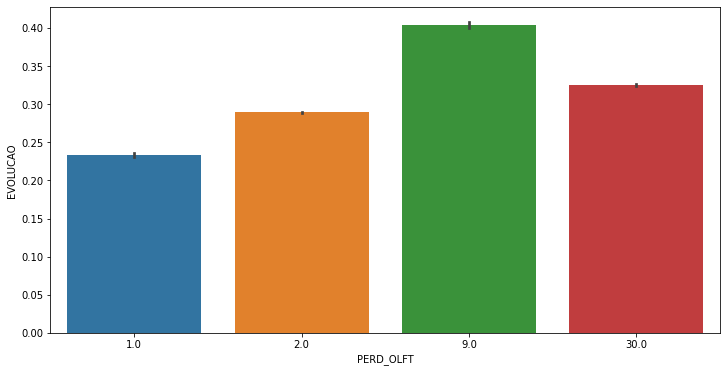

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df[['PERD_OLFT', 'EVOLUCAO']].copy()

plt.figure(figsize = (12,6))
ax = sns.barplot(x="PERD_OLFT", y="EVOLUCAO", data=df1.fillna(30))

In [38]:
df['PERD_OLFT'].value_counts(dropna=False)

2.0    1154923
NaN     996920
1.0     166388
9.0      59554
Name: PERD_OLFT, dtype: int64

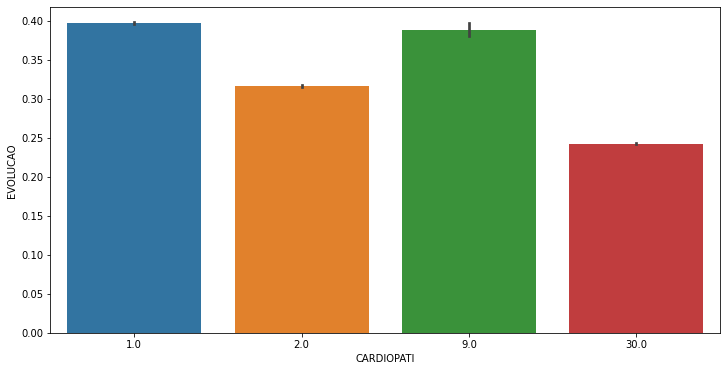

In [39]:
df2 = df[['CARDIOPATI', 'EVOLUCAO']].copy()

plt.figure(figsize = (12,6))
ax = sns.barplot(x="CARDIOPATI", y="EVOLUCAO", data=df2.fillna(30))

In [40]:
df2.CARDIOPATI.value_counts(dropna=False)

NaN    1216602
1.0     717234
2.0     431105
9.0      12844
Name: CARDIOPATI, dtype: int64

É possível observar nestas duas variáveis que não há um grupo semelhante aos NaN (chamado de 30) em nenhum dos casos. No caso da perda olfativa, o 9 não se aproxima nem do 1 e nem do 2 quando se analisa a taxa de óbito. O NaN está próximo do 2, mas não muito.

No caso da cardiopatia, a categoria com mais óbitos é o NaN, portanto é complicado assumir onde jogar este valor.

In [41]:
del df1, df2

In [42]:
sint_morb = sintomas + morbidades
sint_morb

['FEBRE',
 'TOSSE',
 'DISPNEIA',
 'DIARREIA',
 'VOMITO',
 'GARGANTA',
 'DESC_RESP',
 'SATURACAO',
 'DOR_ABD',
 'FADIGA',
 'PERD_OLFT',
 'PERD_PALA',
 'HEMATOLOGI',
 'CARDIOPATI',
 'ASMA',
 'DIABETES',
 'PNEUMOPATI',
 'RENAL',
 'IMUNODEPRE',
 'HEPATICA',
 'NEUROLOGIC',
 'OBESIDADE',
 'PUERPERA',
 'SIND_DOWN']

In [43]:
sint_morb_finais = []

for i in sint_morb:
    df[i.lower()] = 'Nulo'
    
    df.loc[df[i] == 1, i.lower()] = 'Sim'
    df.loc[df[i] == 2, i.lower()] = 'Nao'
    df.loc[df[i] == 9, i.lower()] = 'Ignorado'
    
    sint_morb_finais.append(i.lower())
    
sint_morb_finais

['febre',
 'tosse',
 'dispneia',
 'diarreia',
 'vomito',
 'garganta',
 'desc_resp',
 'saturacao',
 'dor_abd',
 'fadiga',
 'perd_olft',
 'perd_pala',
 'hematologi',
 'cardiopati',
 'asma',
 'diabetes',
 'pneumopati',
 'renal',
 'imunodepre',
 'hepatica',
 'neurologic',
 'obesidade',
 'puerpera',
 'sind_down']

### Variáveis demográficas
As variáveis demográficas necessitam de um tratamento mais específico para cada variável.

In [44]:
demograficos

['SG_UF_NOT',
 'NU_IDADE_N',
 'TP_IDADE',
 'CS_SEXO',
 'CS_GESTANT',
 'CS_RACA',
 'M_AMAMENTA',
 'MAE_VAC',
 'VACINA']

In [45]:
df[demograficos].isnull().sum()

SG_UF_NOT           0
NU_IDADE_N          0
TP_IDADE            0
CS_SEXO             0
CS_GESTANT          0
CS_RACA         41476
M_AMAMENTA    2363589
MAE_VAC       2359467
VACINA         549457
dtype: int64

#### Estado
Para a variável de Estado, não é necessário fazer nenhum tratamento. Esta variável será utilizada apenas na análise exploratória e não entrará no modelo.

Para os dados de 2020:

Os 5 Estados com mais casos são:
* São Paulo;
* Rio de Janeiro;
* Minas Gerais;
* Paraná e;
* Pernambuco.

Os 5 Estados com menos casos, do menor para cima, são:
* Roraima;
* Amapá;
* Acre;
* Tocantins;
* Rondônia.

Vale lembrar que podem se tratar de subnotificações nestes últimos Estados.

In [46]:
df['SG_UF_NOT'].value_counts()

SP    726980
MG    271778
RJ    192813
PR    170342
RS    141766
SC     89637
BA     88580
GO     86628
CE     81829
PE     76554
PA     58539
DF     54244
AM     46972
MS     42480
MT     40392
PB     35441
AL     26938
MA     26622
PI     23074
RN     22116
ES     16658
RO     15659
SE     12698
TO     11664
AC      6470
AP      6173
RR      4738
Name: SG_UF_NOT, dtype: int64

#### Idade

A variável de idade neste banco de dados é composta por 2 colunas, NU_IDADE_N e TP_IDADE. A primeira traz um número inteiro que indica a idade em dias, meses ou anos e a 2a indica qual o tipo da idade, 1 para dia, 2 para mês e 3 para ano. 

Exemplo: NU_IDADE_N = 8, TP_IDADE = 2 -- Idade = 8 meses.

Desse modo, a determinação da idade exige um tratamento especial utilizando as duas variáveis. Vou converter todas as idades para ANO, assim, caso a idade seja 8 meses, vou dividir 8 por 12, que indica 0,67 anos. Caso seja dia, vou dividir por 365 e, caso seja ano, manterei como está.

Para o caso de valores negativos, irei apenas inverter o sinal, pois pode se tratar de um erro.

In [47]:
df.TP_IDADE.value_counts(dropna = False)

3    2326673
2      43806
1       7306
Name: TP_IDADE, dtype: int64

In [48]:
idade_trat = []
idade_temp = 0

for idade, tipo in zip(df.NU_IDADE_N, df.TP_IDADE):
    if tipo == 1:
        idade_temp = abs(round(idade/365,3))
        idade_trat.append(idade_temp)
    elif tipo == 2:
        idade_temp = abs(round(idade/12,3))
        idade_trat.append(idade_temp)
    else:
        idade_temp = abs(idade)
        idade_trat.append(idade_temp)
            
idade_trat = np.asarray(idade_trat)

In [49]:
df['idade'] = idade_trat

In [50]:
df.idade.value_counts().sort_index(ascending = False)

150.000       1
140.000       1
136.000       2
133.000       1
127.000       1
           ... 
0.011       116
0.008       166
0.005       233
0.003       433
0.000      4816
Name: idade, Length: 186, dtype: int64

É possível observar que há idades muito maiores que a [pessoa mais velha do mundo, que viveu 122 anos](https://www.cnnbrasil.com.br/internacional/guinness-aos-112-anos-porto-riquenho-se-torna-homem-mais-velho-do-mundo/).

Desse modo, irei eliminar os registros acima de 122 anos.

In [51]:
df = df[df['idade'] < 122]

#### Sexo

A variável sexo possui 3 possibilidades:

* M - Masculino
* F - Feminino
* I - Ignorado

Como há apenas 410 ignorados, vou apenas eliminar estes registros pois não há como tratá-los.

In [52]:
df['CS_SEXO'].value_counts()

M    1298155
F    1079114
I        509
Name: CS_SEXO, dtype: int64

In [53]:
df = df[df['CS_SEXO'] != 'I']

#### Gestante

Esta variável indica a idade gestacional do paciente. O campo só é habilitado se o sexo for Feminino.

Os possíveis valores são:

* 0 - Não está na documentação.
* 1 - 1º Trimestre
* 2 - 2º Trimestre
* 3 - 3º Trimestre
* 4 - Idade gestacional ignorada
* 5 - Não
* 6 - Não se aplica
* 9 - Ignorado

É importante para checar se a gestação é um fator de risco para SRAG.

In [54]:
df.CS_GESTANT.value_counts(dropna=False)

6    1503166
5     746138
9     105117
3      13236
2       5942
1       2354
4       1090
0        226
Name: CS_GESTANT, dtype: int64

Para uma melhor avaliação desta variável após a dummificação, vou transformar os números em strings e utilizar apenas as classificações de SIM, NÃO, NÃO SE APLICA. Os Ignorados e o 0 serão classificados como NÃO.

Abaixo vou verificar para alguns valores, se o sexo está correto, uma vez que apenas pessoas do sexo Feminino engravidam.

Pela documentação temos:

* Se selecionado categoria 2-Feminino no campo Sexo.
* Se selecionado sexo igual a Masculino ou a idade for menor ou igual a 9 anos o campo é preenchido automaticamente com 6-Não se aplica.
* Se selecionado sexo igual a Feminino e idade for maior que 9 anos, o campo não pode ser preenchido com 6-Não se aplica.

In [55]:
print(df[df['CS_GESTANT'] == 0]['CS_SEXO'].unique())
print(df[df['CS_GESTANT'] == 1]['CS_SEXO'].unique())
print(df[df['CS_GESTANT'] == 2]['CS_SEXO'].unique())
print(df[df['CS_GESTANT'] == 3]['CS_SEXO'].unique())
print(df[df['CS_GESTANT'] == 4]['CS_SEXO'].unique())
print(df[df['CS_GESTANT'] == 5]['CS_SEXO'].unique())
print(df[df['CS_GESTANT'] == 6]['CS_SEXO'].unique())
print(df[df['CS_GESTANT'] == 9]['CS_SEXO'].unique())

['M' 'F']
['F']
['F']
['F']
['F']
['F' 'M']
['M' 'F']
['F' 'M']


Tudo certo com relação ao sexo. Precisamos verificar a idade.

In [56]:
print(df[df['CS_GESTANT'] == 1]['idade'].unique())
print(df[df['CS_GESTANT'] == 2]['idade'].unique())
print(df[df['CS_GESTANT'] == 3]['idade'].unique())

[31. 24. 28. 25. 23. 33. 29. 40. 39. 18. 22. 34. 37. 35. 30. 27. 26. 54.
 21. 38. 36. 45. 32. 20. 17. 44. 16. 15. 53. 19. 41. 58. 43. 46. 42. 14.
 55. 13. 47. 56. 60. 49. 50. 57. 51. 52. 48. 12. 59.]
[16. 20. 32. 19. 24. 23. 55. 29. 21. 22. 26. 35. 18. 42. 28. 33. 34. 45.
 36. 37. 31. 27. 14. 25. 38. 30. 39. 17. 56. 13. 44. 50. 15. 40. 41. 60.
 58. 48. 43. 53. 12. 57. 51. 46. 47. 49. 10. 59. 52. 54.  9.]
[29. 20. 28. 26. 31. 17. 36. 35. 22. 24. 34. 40. 39. 33. 21. 27. 25. 37.
 16. 30. 15. 19. 38. 44. 32. 42. 23. 18. 49. 43. 41. 48. 14. 13. 45. 46.
 51. 47. 54. 52. 11. 12. 58. 55. 56. 57. 53. 59. 50. 60.]


In [57]:
df = df.reset_index(drop=True)

Vendo pelo dado acima, é possível observar que há apenas 1 pessoa gestante com idade menor que 10 anos, vou eliminar este registro.

In [58]:
indice_gest_drop = []

for i, (idade, gest) in enumerate(zip(df.idade, df.CS_GESTANT)):
    if (gest == 1 or gest == 2 or gest == 3) and idade < 10:
        indice_gest_drop.append(i)      

df = df.drop(indice_gest_drop)

In [59]:
print(df[df['CS_GESTANT'] == 1]['idade'].unique())
print(df[df['CS_GESTANT'] == 2]['idade'].unique())
print(df[df['CS_GESTANT'] == 3]['idade'].unique())

[31. 24. 28. 25. 23. 33. 29. 40. 39. 18. 22. 34. 37. 35. 30. 27. 26. 54.
 21. 38. 36. 45. 32. 20. 17. 44. 16. 15. 53. 19. 41. 58. 43. 46. 42. 14.
 55. 13. 47. 56. 60. 49. 50. 57. 51. 52. 48. 12. 59.]
[16. 20. 32. 19. 24. 23. 55. 29. 21. 22. 26. 35. 18. 42. 28. 33. 34. 45.
 36. 37. 31. 27. 14. 25. 38. 30. 39. 17. 56. 13. 44. 50. 15. 40. 41. 60.
 58. 48. 43. 53. 12. 57. 51. 46. 47. 49. 10. 59. 52. 54.]
[29. 20. 28. 26. 31. 17. 36. 35. 22. 24. 34. 40. 39. 33. 21. 27. 25. 37.
 16. 30. 15. 19. 38. 44. 32. 42. 23. 18. 49. 43. 41. 48. 14. 13. 45. 46.
 51. 47. 54. 52. 11. 12. 58. 55. 56. 57. 53. 59. 50. 60.]


Tratamento

In [60]:
df['gravidez'] = 0

df.loc[df['CS_GESTANT'] == 1, 'gravidez'] = 1
df.loc[df['CS_GESTANT'] == 2, 'gravidez'] = 1
df.loc[df['CS_GESTANT'] == 3, 'gravidez'] = 1
df.loc[df['CS_GESTANT'] == 4, 'gravidez'] = 1

In [61]:
df.gravidez.value_counts()

0    2354647
1      22621
Name: gravidez, dtype: int64

#### Raça

O campo RAÇA pode ser utilizado para uma avaliação demográfica da SRAG, de modo a identificar quais grupos étnicos são mais afetados pela doença e se há alguma diferenciação entre os grupos no quesito óbito e se é um fator determinante para a SRAG.

O campo é dado por:

* 1 - Branca
* 2 - Preta
* 3 - Amarela
* 4 - Parda
* 5 - Indígena
* 9 - Ignorado

In [62]:
df.CS_RACA.value_counts(dropna=False)

1.0    996865
4.0    811279
9.0    392475
2.0    107151
NaN     41470
3.0     23121
5.0      4907
Name: CS_RACA, dtype: int64

In [63]:
df['raca'] = 'Desconhecido'

df.loc[df['CS_RACA'] == 1, 'raca'] = 'Branca'
df.loc[df['CS_RACA'] == 2, 'raca'] = 'Preta'
df.loc[df['CS_RACA'] == 3, 'raca'] = 'Amarela'
df.loc[df['CS_RACA'] == 4, 'raca'] = 'Parda'
df.loc[df['CS_RACA'] == 5, 'raca'] = 'Indigena'
df.loc[df['CS_RACA'] == 9, 'raca'] = 'Ignorado'

In [64]:
df['raca'].value_counts(dropna = False)

Branca          996865
Parda           811279
Ignorado        392475
Preta           107151
Desconhecido     41470
Amarela          23121
Indigena          4907
Name: raca, dtype: int64

#### Vacina

O campo vacina é de suma importância para a análise. Sabemos hoje, em 2021, que a vacina da gripe ajuda a prevenir os sintomas graves até da COVID, portanto, esse campo é importante para SRAG como um todo.

Em 2020 ainda não havia vacina contra a COVID-19.

O campo é dado por:
* 1 - Sim
* 2 - Não
* 9 - Ignorado

In [65]:
print(df['VACINA'].value_counts(dropna=False))
print()
print(df['VACINA'].value_counts(dropna=False, normalize = True))

9.0    836526
2.0    740951
NaN    549238
1.0    250553
Name: VACINA, dtype: int64

9.0    0.351885
2.0    0.311682
NaN    0.231037
1.0    0.105395
Name: VACINA, dtype: float64


Apesar de ser uma ótima informação para a análise, podemos observar que muitas vezes o médico não pergunta para o paciente se ele foi vacinado ou não e apenas ignora o campo. em 37% dos casos isso aconteceu. 

Para este tratamento, vou manter 3 categorias, Sim, Não e Ignorado. Passar os ignorados para "Não" inflaria muito esta categoria, portanto não seria ideal.

Os NaN serão colocados sob a categoria "Ignorado"

In [66]:
trat_nan_nove('VACINA', 'vacina_gripe')

In [67]:
df['vacina_gripe'].value_counts(dropna = False)

Ignorado    836526
Nao         740951
Nulo        549238
Sim         250553
Name: vacina_gripe, dtype: int64

#### Mãe Amamenta

Pela documentação: Se paciente < 6 meses, a mãe amamenta a criança?

Este campo estará majoritariamente vazio, mas, no caso de pessoas abaixo de 6 meses (0,5 anos), é importante.

O campo é dado por:
* 1 - Sim
* 2 - Não
* 9 - Ignorado

Os ignorados serão classificados como "NÃO" e os NaN como "NÃO" também.

In [68]:
df.M_AMAMENTA.value_counts(dropna=False)

NaN    2363109
1.0       5500
9.0       4864
2.0       3795
Name: M_AMAMENTA, dtype: int64

Vou verificar se as idades, para as quais o campo foi habilitado para preenchimento, estão corretas.

In [69]:
df[df.M_AMAMENTA.notna()]['idade'].value_counts()

0.083     3468
0.167     2617
0.250     1873
0.000     1787
0.333     1483
0.417     1153
0.003      189
0.500      113
0.022       99
0.005       95
0.025       95
0.033       87
0.027       85
0.008       78
0.019       74
0.030       74
0.038       71
0.036       70
0.016       57
0.049       56
0.014       54
0.047       53
0.041       52
0.044       51
0.052       49
0.011       46
0.060       35
0.055       33
0.058       31
0.066       26
0.068       20
0.071       19
0.074       13
0.063       13
0.077        7
0.079        5
1.000        3
53.000       2
26.000       2
68.000       2
28.000       1
5.000        1
0.750        1
70.000       1
48.000       1
65.000       1
61.000       1
3.000        1
4.000        1
38.000       1
2.000        1
55.000       1
45.000       1
62.000       1
0.667        1
73.000       1
69.000       1
84.000       1
0.082        1
Name: idade, dtype: int64

In [70]:
df[df.M_AMAMENTA.isna()]['idade'].value_counts().sort_index(ascending = True)

0.000      2971
0.003       238
0.005       136
0.008        87
0.011        68
           ... 
117.000       5
118.000       1
119.000       1
120.000       4
121.000       1
Name: idade, Length: 180, dtype: int64

É possível observar que há alguns valores de idade incorretos, acima de 6 meses. Além disso, é possível observar que há muitos registros que deveriam conter a informação mas estão como NaN, estes são os valores com idade abaixo de 1.

Para o primeiro caso, irei eliminar os registros com idade incorreta. Para o segundo caso, como é altamente provável que a mãe amamente a [criança abaixo de 6 meses](https://www.trocandofraldas.com.br/ate-quando-amamentar/#:~:text=A%20Organiza%C3%A7%C3%A3o%20Mundial%20de%20Sa%C3%BAde,sem%20outros%20alimentos%20ou%20l%C3%ADquidos), vou classificar estes registros como "Sim". 

In [71]:
df = df.reset_index(drop=True)

In [72]:
amam_drop = []

for i, (idade, amam) in enumerate(zip(df.idade, df.M_AMAMENTA)):
    if pd.notna(amam) and idade > 1:
        amam_drop.append(i)

df = df.drop(amam_drop)

In [73]:
df[df.M_AMAMENTA.notna()]['idade'].value_counts()

0.083    3468
0.167    2617
0.250    1873
0.000    1787
0.333    1483
0.417    1153
0.003     189
0.500     113
0.022      99
0.005      95
0.025      95
0.033      87
0.027      85
0.008      78
0.030      74
0.019      74
0.038      71
0.036      70
0.016      57
0.049      56
0.014      54
0.047      53
0.041      52
0.044      51
0.052      49
0.011      46
0.060      35
0.055      33
0.058      31
0.066      26
0.068      20
0.071      19
0.063      13
0.074      13
0.077       7
0.079       5
1.000       3
0.667       1
0.750       1
0.082       1
Name: idade, dtype: int64

Tudo certo. Agora para a parte 2

In [74]:
amam_trat = []

amam_temp = 0

for idade, amam in zip(df.idade, df.M_AMAMENTA):
    if pd.isna(amam) and idade <= 0.5:
        amam_temp = 1
        amam_trat.append(amam_temp)
    else:
        amam_temp = amam
        amam_trat.append(amam_temp)

amam_trat = np.asarray(amam_trat)
df['amam_trat'] = amam_trat

In [75]:
df['mae_amamenta'] = 0

df.loc[df['amam_trat'] == 1, 'mae_amamenta'] = 1

In [76]:
df.mae_amamenta.value_counts(dropna=False)

0    2348580
1      28666
Name: mae_amamenta, dtype: int64

#### Mãe Vacinada

Da documentação: Se paciente < 6 meses, a mãe recebeu vacina?

O campo é composto por:

* 1 - Sim
* 2 - Não
* 9 - Ignorado

Os ignorados e os NaN serão classificados como "Não"

In [77]:
df.MAE_VAC.value_counts(dropna=False)

NaN    2359001
9.0       9116
2.0       7302
1.0       1827
Name: MAE_VAC, dtype: int64

In [78]:
df[df.MAE_VAC == 1]['idade'].value_counts().sort_index(ascending = True)

0.000     188
0.003      27
0.005      14
0.008       4
0.011       9
0.014       6
0.016       9
0.019      10
0.022      15
0.025      16
0.027      16
0.030      14
0.033      10
0.036       6
0.038       5
0.041       8
0.044      10
0.047       4
0.049       5
0.052       7
0.055       1
0.058       3
0.060       6
0.063       2
0.066       1
0.068       4
0.071       1
0.074       2
0.083     485
0.167     367
0.250     237
0.333     178
0.417     140
0.500      15
60.000      1
80.000      1
Name: idade, dtype: int64

Neste caso vou optar por não tratar os problemas de idade, já que é apenas 1 registro. Vou apenas fazer a dummificação.

In [79]:
df['mae_vacinada_gripe'] = 0

df.loc[df['MAE_VAC'] == 1, 'mae_vacinada_gripe'] = 1

In [80]:
df.mae_vacinada_gripe.value_counts(dropna=False)

0    2375419
1       1827
Name: mae_vacinada_gripe, dtype: int64

In [81]:
demog_finais = ['SG_UF_NOT', 'idade', 'CS_SEXO', 'gravidez', 'raca', 'vacina_gripe', 'mae_amamenta', 'mae_vacinada_gripe']

### Variáveis de DOENÇA e DIAGNÓSTICO

In [82]:
doediag

['EVOLUCAO',
 'CLASSI_FIN',
 'ANTIVIRAL',
 'SUPORT_VEN',
 'UTI',
 'HISTO_VGM',
 'POS_PCRFLU',
 'TP_FLU_PCR',
 'POS_PCROUT',
 'PCR_VSR',
 'PCR_PARA1',
 'PCR_PARA2',
 'PCR_PARA3',
 'PCR_PARA4',
 'PCR_ADENO',
 'PCR_METAP',
 'PCR_BOCA',
 'PCR_RINO',
 'PCR_SARS2',
 'RES_AN',
 'POS_AN_FLU',
 'TP_FLU_AN',
 'POS_AN_OUT',
 'AN_SARS2',
 'AN_VSR',
 'AN_PARA1',
 'AN_PARA2',
 'AN_PARA3',
 'AN_ADENO',
 'AN_OUTRO',
 'RES_IGG',
 'RES_IGM',
 'RES_IGA']

In [83]:
df[doediag].isnull().sum()

EVOLUCAO            0
CLASSI_FIN       5971
ANTIVIRAL      354539
SUPORT_VEN     281592
UTI            283474
HISTO_VGM           0
POS_PCRFLU    1687306
TP_FLU_PCR    2375244
POS_PCROUT    1274513
PCR_VSR       2368775
PCR_PARA1     2376940
PCR_PARA2     2377147
PCR_PARA3     2376602
PCR_PARA4     2376982
PCR_ADENO     2376303
PCR_METAP     2376786
PCR_BOCA      2376582
PCR_RINO      2371473
PCR_SARS2     1296758
RES_AN         324853
POS_AN_FLU    2193887
TP_FLU_AN     2376581
POS_AN_OUT    2130695
AN_SARS2      2152253
AN_VSR        2374554
AN_PARA1      2377225
AN_PARA2      2377237
AN_PARA3      2377175
AN_ADENO      2377174
AN_OUTRO      2358233
RES_IGG       2084657
RES_IGM       2077165
RES_IGA       2170862
dtype: int64

In [84]:
df = df.reset_index(drop=True)

#### Evolução (variável resposta)

Já tratada acima

In [85]:
df.EVOLUCAO.value_counts(dropna=False, normalize = True)

0    0.69676
1    0.30324
Name: EVOLUCAO, dtype: float64

#### Classificação final do caso

Traz o motivo da SRAG.

O campo é composto por:

* 1 - SRAG por influenza
* 2 - SRAG por outro vírus respiratório
* 3 - SRAG por outro agente etiológico, qual:
* 4 - SRAG não especificado
* 5 - SRAG por COVID-19

Irei transformar esta variável em 4 valores, 'COVID', 'Desconhecido', 'Influenza' e 'Outros'. NaN será colocado em 'Desconhecido'.

É curioso pensar que, entre 2013 e 2018 tivemos, aproximadamente, 190 mil casos, sem a existência de covid e, em 2020, tivemos 385 mil casos de SRAG no SUS de causa Desconhecida. Seria por causa de subnotificação?

In [86]:
print(df.CLASSI_FIN.value_counts(dropna=False))
print()
print(df.CLASSI_FIN.value_counts(dropna=False, normalize=True))

5.0    1709040
4.0     634637
2.0      18130
3.0       6161
NaN       5971
1.0       3307
Name: CLASSI_FIN, dtype: int64

5.0    0.718916
4.0    0.266963
2.0    0.007626
3.0    0.002592
NaN    0.002512
1.0    0.001391
Name: CLASSI_FIN, dtype: float64


É notório como a COVID-19 mudou o cenário da SRAG, 62% dos casos são por COVID-19.

In [87]:
df['diagnostico'] = 'Desconhecido'

df.loc[df['CLASSI_FIN'] == 1, 'diagnostico'] = 'Influenza'
df.loc[df['CLASSI_FIN'] == 2, 'diagnostico'] = 'Outros'
df.loc[df['CLASSI_FIN'] == 3, 'diagnostico'] = 'Outros'
df.loc[df['CLASSI_FIN'] == 5, 'diagnostico'] = 'COVID'

In [88]:
print(df.diagnostico.value_counts(dropna=False))
print()
print(df.diagnostico.value_counts(dropna=False, normalize=True))

COVID           1709040
Desconhecido     640608
Outros            24291
Influenza          3307
Name: diagnostico, dtype: int64

COVID           0.718916
Desconhecido    0.269475
Outros          0.010218
Influenza       0.001391
Name: diagnostico, dtype: float64


#### Uso de Antiviral

A variável ANTIVIRAL indica se o paciente fez uso de antiviral para tratar a doença. As categorias trazem 2 dos mais utilizados. É uma variável relevante pois pode indicar se o tratamento com antiviral faz sentido para SRAG, que geralmente é causada por vírus.

As categorias são: 
* 1 - Sim
* 2 - Não
* 9 - Ignorado

Utilizarei a função de tratamento

In [89]:
df.ANTIVIRAL.value_counts(dropna=False)

2.0    1486551
NaN     354539
9.0     333989
1.0     202167
Name: ANTIVIRAL, dtype: int64

In [90]:
trat_nan_nove('ANTIVIRAL', 'antiviral')

In [91]:
df.antiviral.value_counts(dropna=False)

Nao         1486551
Nulo         354539
Ignorado     333989
Sim          202167
Name: antiviral, dtype: int64

#### Suporte ventilatório

Da categoria: O paciente fez uso de suporte ventilatório?

* 1 - Sim, invasivo
* 2 - Sim, não invasivo
* 3 - Não
* 9 - Ignorado

Os NaN entrarão como "Não".

In [92]:
df['SUPORT_VEN'].value_counts(dropna = False)

2.0    1141404
3.0     487480
1.0     391861
NaN     281592
9.0      74909
Name: SUPORT_VEN, dtype: int64

In [93]:
df['suporte_vent'] = 'Nulo'

df.loc[df['SUPORT_VEN'] == 1, 'suporte_vent'] = 'Invasivo'
df.loc[df['SUPORT_VEN'] == 2, 'suporte_vent'] = 'Nao-invasivo'
df.loc[df['SUPORT_VEN'] == 3, 'suporte_vent'] = 'Nao'
df.loc[df['SUPORT_VEN'] == 9, 'suporte_vent'] = 'Ignorado'

In [94]:
df['suporte_vent'].value_counts(dropna = False)

Nao-invasivo    1141404
Nao              487480
Invasivo         391861
Nulo             281592
Ignorado          74909
Name: suporte_vent, dtype: int64

#### UTI

A variável UTI é importante para avaliarmos a gravidade da evolução da doença. Ela, juntamente com a variável de suporte ventilatório, podem nos dizer se um paciente foi internado e intubado devido a SRAG. Como vemos atualmente com o coronavirus, quando um paciente é internado e intubado a chance de óbito aumenta consideravelmente, como mostra [esta reportagem](https://www.bbc.com/portuguese/brasil-56407803) que afirma que **80% dos intubados por covid-19 morreram no Brasil em 2020.**

A documentação retrata que a variável UTI possui as seguintes categorias:

* 1 - Sim
* 2 - Não
* 9 - Ignorado

Já a variável SUPORT_VEN possui as categorias:

* 1 - Sim, invasivo
* 2 - Sim, não invasivo
* 3 - Não
* 9 - Ignorado

Para o tratamento da variável UTI, utilizarei a variável de SUPORT_VEN como auxiliar. Nos casos em que houve suporte ventilatório INVASIVO e a variável UTI está como NaN, vou inferir que o paciente eventualmente foi para a UTI para acompanhamento. Nos outros casos, vou inferir que o paciente não foi para a UTI.

Para os UTI = 9 também utilizarei a mesma premissa. No fim, UTI ficará com 2 valores, 0 (Não) e 1 (Sim).

In [95]:
df['UTI'].value_counts(dropna = False)

2.0    1325149
1.0     724970
NaN     283474
9.0      43653
Name: UTI, dtype: int64

In [96]:
df[df['UTI'].isnull()]['SUPORT_VEN'].value_counts(dropna=False)

NaN    179223
2.0     50029
3.0     37312
1.0     10322
9.0      6588
Name: SUPORT_VEN, dtype: int64

In [97]:
df[df['UTI'] == 9]['SUPORT_VEN'].value_counts(dropna=False)

9.0    22520
2.0    12242
3.0     3454
NaN     2931
1.0     2506
Name: SUPORT_VEN, dtype: int64

In [98]:
# Vou fazer o tratamento por etapas para não ter confusão no entendimento. Inicialmente vou atender a condição descrita acima
# e depois transformar tudo para 0 e 1
UTI_trat = []
UTI_temp = -1

for i, j in zip(df['UTI'], df['SUPORT_VEN']):
    if (j == 1 and pd.isnull(i)) or (j == 1 and i == 9):
        UTI_temp = 1
        UTI_trat.append(UTI_temp)
    else:
        UTI_temp = i
        UTI_trat.append(UTI_temp)
        
UTI_trat = np.asarray(UTI_trat)

In [99]:
df['uti_aux'] = UTI_trat

In [100]:
df['uti_aux'].value_counts(dropna = False)

2.0    1325149
1.0     737798
NaN     273152
9.0      41147
Name: uti_aux, dtype: int64

In [101]:
trat_nan_nove('uti_aux', 'uti')

# df = (
#     df.assign
#     (
#         uti = np.where((df.uti == 2) | (df.uti == 9), 0, df.uti.fillna(0))
#     )
# )

df['uti'].value_counts(dropna=False)

Nao         1325149
Sim          737798
Nulo         273152
Ignorado      41147
Name: uti, dtype: int64

#### Histórico de viagem

No início da pandemia soubemos que o primeiro caso foi um [homem de 61 anos que viajou à Itália](https://www.sanarmed.com/linha-do-tempo-do-coronavirus-no-brasil) emn 26/02/2020, desse modo, a viagem a outros países é um problema. Sabemos que o vírus também possui variantes e que estas podem ser adquiridas em outros países, por isso esta variável é importante. Será que pacientes que viajaram para outros países morrem mais?

A variável possui as categorias:
* 0 - _Não está na documentação_
* 1 - Sim
* 2 - Não
* 9 - Ignorado

In [102]:
df.HISTO_VGM.value_counts(dropna=False)

0    1482172
2     762342
9     131708
1       1024
Name: HISTO_VGM, dtype: int64

Podemos ver que é uma variável que possui apenas 998 registros de Sim e o resto teria de entrar no campo do Não. Infelizmente há nenhuma maneira de utilizar esta variável no problema, pois, além de possuir uma categoria não documentada com muitos registros, ainda possui muitos registros como "ignorado". Vou optar por não utilizá-la.

#### PCR e teste de antígeno positivo para outro vírus e/ou positivo para VSR, Parainfluenza 1, 2 e 3, Adenovirus, Metapneumovírus, Bocavirus, Rinovirus, Influenza e SARS-Cov-2 (Covid-19) 

Com exceção do PCR e teste de antígeno para Influenza e Outros vírus, os campos dos testes possuem as seguintes características:

* 1 - Positivo
* 2 - Não preenchido ou negativo

Já os campos de Influenza e Outros vírus são dados por:

* 1 - Sim
* 2 - Não
* 9 - Ignorado

A variável Tipo de Influenza possui as categorias
* 1 - Influenza A
* 2 - Influenza B

In [103]:
pcr_an_doencas = ['POS_PCRFLU', 'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO', 
               'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_SARS2', 'RES_AN', 'POS_AN_FLU', 'AN_SARS2', 'AN_VSR', 'AN_PARA1',
               'AN_PARA2', 'AN_PARA3', 'AN_ADENO', 'AN_OUTRO']
len(pcr_an_doencas)

21

In [104]:
for i in pcr_an_doencas:
    print(df[i].value_counts(dropna = False))
    print("")

NaN    1687306
2.0     609448
9.0      78475
1.0       2017
Name: POS_PCRFLU, dtype: int64

NaN    1274513
1.0    1097317
2.0       4236
9.0       1180
Name: POS_PCROUT, dtype: int64

NaN    2368775
1.0       8471
Name: PCR_VSR, dtype: int64

NaN    2376940
1.0        306
Name: PCR_PARA1, dtype: int64

NaN    2377147
1.0         99
Name: PCR_PARA2, dtype: int64

NaN    2376602
1.0        644
Name: PCR_PARA3, dtype: int64

NaN    2376982
1.0        264
Name: PCR_PARA4, dtype: int64

NaN    2376303
1.0        943
Name: PCR_ADENO, dtype: int64

NaN    2376786
1.0        460
Name: PCR_METAP, dtype: int64

NaN    2376582
1.0        664
Name: PCR_BOCA, dtype: int64

NaN    2371473
1.0       5773
Name: PCR_RINO, dtype: int64

NaN    1296758
1.0    1080488
Name: PCR_SARS2, dtype: int64

5.0    1028640
4.0     652648
NaN     324853
1.0     286436
2.0      64812
9.0      19589
3.0        268
Name: RES_AN, dtype: int64

NaN    2193887
2.0     164284
9.0      18406
1.0        669
Name: POS_AN_FLU,

As variáveis RES_AN, TP_FLU_AN e TP_FLU_PCR não fazem sentido para a análise, uma vez que RES_AN apenas acompanha o resultado do teste de antígeno mas não identifica a doença e não irei analisar o subtipo de Influenza, apenas se o paciente teve influenza.

Nem todos os vírus que se testam com PCR é feito também o teste com Antígeno, como por exemplo Bocavirus, Rinovirus, entre outros.

Lembrando que, por mais que o paciente seja diagnosticado com a doença, pode ser que a causa da SRAG não tenha sido esta doença em si.

In [105]:
pcr_doencas = ['PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_ADENO', 'PCR_SARS2']
antigeno_doencas = ['AN_VSR', 'AN_PARA1', 'AN_PARA2', 'AN_PARA3', 'AN_ADENO', 'AN_SARS2']

In [106]:
df = df.reset_index(drop=True)

In [107]:
# Loop para as doenças que tem teste com antígeno e PCR. Se 1 em qlqr uma das duas colunas, 1 para a doença.
for i, j in zip(pcr_doencas, antigeno_doencas):
    
    col_temp = []
    col_num = -1
    
    for k, l in zip(df[i], df[j]):
        if (k == 1 or l == 1):
            col_num = 1
            col_temp.append(col_num)
        else:
            col_num = 0
            col_temp.append(col_num)
        
    df['positivo_' + j.lower().split('_')[1]] = col_temp   

In [108]:
doencas_faltantes = []
for i in pcr_an_doencas:
    if i not in pcr_doencas and i not in antigeno_doencas:
        doencas_faltantes.append(i)
        
doencas_faltantes

['POS_PCRFLU',
 'POS_PCROUT',
 'PCR_PARA4',
 'PCR_METAP',
 'PCR_BOCA',
 'PCR_RINO',
 'RES_AN',
 'POS_AN_FLU',
 'AN_OUTRO']

In [109]:
influ_temp = []
influ_num_temp = -1

for i, j in zip(df.POS_PCRFLU, df.POS_AN_FLU):
    if (i == 1 or j == 1):
        influ_num_temp = 1
        influ_temp.append(influ_num_temp)
    
    else:
        influ_num_temp = 0
        influ_temp.append(influ_num_temp)

df['positivo_influenza'] = influ_temp

outro_temp = []
outro_num_temp = -1

for i, j in zip(df.POS_PCROUT, df.AN_OUTRO):
    if (i == 1 or j == 1):
        outro_num_temp = 1
        outro_temp.append(outro_num_temp)
    
    else:
        outro_num_temp = 0
        outro_temp.append(outro_num_temp)
        
df['positivo_outro'] = outro_temp

In [110]:
df['positivo_para4'] = 0

df.loc[df['PCR_PARA4'] == 1, 'positivo_para4'] = 1

df['positivo_metap'] = 0

df.loc[df['PCR_METAP'] == 1, 'positivo_metap'] = 1

df['positivo_boca'] = 0

df.loc[df['PCR_BOCA'] == 1, 'positivo_boca'] = 1

df['positivo_rino'] = 0

df.loc[df['PCR_RINO'] == 1, 'positivo_rino'] = 1

In [111]:
for i in df.columns[93:]:
    print(df[i].value_counts(dropna = False))
    print("")

NaN    2376850
3.0        312
1.0         57
5.0         11
2.0         10
4.0          6
Name: PCR_FLUBLI, dtype: int64

NaN                 2377240
SARS-COV-2                2
NAO ESPECIFICADO          1
SAZONAL                   1
N1N1                      1
H1N1                      1
Name: FLUBLI_OUT, dtype: int64

NaN    1274513
1.0    1097317
2.0       4236
9.0       1180
Name: POS_PCROUT, dtype: int64

NaN    2368775
1.0       8471
Name: PCR_VSR, dtype: int64

NaN    2376940
1.0        306
Name: PCR_PARA1, dtype: int64

NaN    2377147
1.0         99
Name: PCR_PARA2, dtype: int64

NaN    2376602
1.0        644
Name: PCR_PARA3, dtype: int64

NaN    2376982
1.0        264
Name: PCR_PARA4, dtype: int64

NaN    2376303
1.0        943
Name: PCR_ADENO, dtype: int64

NaN    2376786
1.0        460
Name: PCR_METAP, dtype: int64

NaN    2376582
1.0        664
Name: PCR_BOCA, dtype: int64

NaN    2371473
1.0       5773
Name: PCR_RINO, dtype: int64

NaN    2372664
1.0       4582
Name: PCR_O

NaN                            2375598
CACHORRO                           706
GATO                               180
CAO                                 78
CACHORRO E GATO                     45
                                ...   
AVES E CACHORROS                     1
GATO/FELINO                          1
GATO1                                1
CACHORRO E GATOS                     1
GENITOR TRABALHA EM FAZENDA          1
Name: OUT_ANIM, Length: 251, dtype: int64

2.0    1194595
NaN    1013622
1.0     118047
9.0      50982
Name: DOR_ABD, dtype: int64

NaN    943523
2.0    927833
1.0    458674
9.0     47216
Name: FADIGA, dtype: int64

2.0    1154683
NaN     996675
1.0     166367
9.0      59521
Name: PERD_OLFT, dtype: int64

2.0    1149770
NaN     998346
1.0     168849
9.0      60281
Name: PERD_PALA, dtype: int64

NaN    1073881
1.0     670734
6.0     358356
9.0     113471
5.0      65006
2.0      50948
3.0      35662
4.0       9188
Name: TOMO_RES, dtype: int64

NaN                    

Sim         1325124
Nao          609620
Nulo         412009
Ignorado      30493
Name: desc_resp, dtype: int64

Sim         1439788
Nao          546755
Nulo         357210
Ignorado      33493
Name: saturacao, dtype: int64

Nao         1194595
Nulo        1013622
Sim          118047
Ignorado      50982
Name: dor_abd, dtype: int64

Nulo        943523
Nao         927833
Sim         458674
Ignorado     47216
Name: fadiga, dtype: int64

Nao         1154683
Nulo         996675
Sim          166367
Ignorado      59521
Name: perd_olft, dtype: int64

Nao         1149770
Nulo         998346
Sim          168849
Ignorado      60281
Name: perd_pala, dtype: int64

Nulo        1471180
Nao          864997
Ignorado      23618
Sim           17451
Name: hematologi, dtype: int64

Nulo        1216258
Sim          717149
Nao          431003
Ignorado      12836
Name: cardiopati, dtype: int64

Nulo        1455155
Nao          822144
Sim           78110
Ignorado      21837
Name: asma, dtype: int64

Nulo        1

Como as variáveis "positivo_outro" e "positivo_sars2" possuem alta correlação positiva, vou assumir que os diagnósticos de COVID-19 também estão dentro da 1a. Assim, caso o diagnóstico seja 1 em positivo_outro ou 1 em positivo_sars2, será considerado como sars2

In [112]:
df = df.reset_index(drop=True)

In [113]:
sars2_temp = []
sars2_num_temp = -1

for i, j in zip(df.positivo_outro, df.positivo_sars2):
    if (i == 1 or j == 1):
        sars2_num_temp = 1
        sars2_temp.append(sars2_num_temp)
    else:
        sars2_num_temp = 0
        sars2_temp.append(sars2_num_temp)
        
df['positivo_sars2'] = sars2_temp

In [114]:
df['positivo_sars2'].value_counts(dropna=False)

1    1309453
0    1067793
Name: positivo_sars2, dtype: int64

#### Resultados IgG, IgA e IgM

Os resultados de exames de anticorpos para COVID não possuem, na documentação, o que cada categoria significa, desse modo, serão excluídas da análise.

#### Vacinação COVID-19

Conforme citado acima, irei montar a coluna "vacina_covid19" a partir de 3 campos, VACINA_COV, DOSE_1_COV e DOSE_2_COV.

Como sabemos que há problemas de preenchimento do banco, vou fazer a seguinte lógica:

Se VACINA_COV = 1 ou DOSE_1_COV != nulo ou DOSE_2_COV != nulo, vacina_covid19 = 1, caso contrário, seguirá a classe inicial, Ignorado ou NaN

In [115]:
df.VACINA_COV.value_counts(dropna=False)

NaN    1459036
2.0     450205
1.0     251139
9.0     216866
Name: VACINA_COV, dtype: int64

In [116]:
import datetime

vacina_covid19_temp = []
vacina_covid19_num_temp = 'TESTE'
prim_vac_brasil = datetime.date(2021, 1, 17) # Data da 1a vacina no brasil

for vac_cov, dose_1, dose_2, data_notific  in zip(df.VACINA_COV, df.DOSE_1_COV, df.DOSE_2_COV, df.DT_NOTIFIC):
    if vac_cov == 1 or pd.notna(dose_1) or pd.notna(dose_2):
        vacina_covid19_num_temp = 'Sim'
        vacina_covid19_temp.append(vacina_covid19_num_temp)
    
    elif vac_cov == 2:
        vacina_covid19_num_temp = 'Nao'
        vacina_covid19_temp.append(vacina_covid19_num_temp)
    
    elif vac_cov == 9:
        vacina_covid19_num_temp = 'Ignorado'
        vacina_covid19_temp.append(vacina_covid19_num_temp)
    
    elif pd.isna(vac_cov) and data_notific < prim_vac_brasil:
        vacina_covid19_num_temp = 'Nao-disponivel'
        vacina_covid19_temp.append(vacina_covid19_num_temp)
    
    else:
        vacina_covid19_num_temp = 'Nulo'
        vacina_covid19_temp.append(vacina_covid19_num_temp)  

df['vacina_covid19'] = vacina_covid19_temp

In [117]:
df.vacina_covid19.value_counts(dropna=False)

Nao-disponivel    1034770
Nao                449641
Nulo               423757
Sim                252534
Ignorado           216544
Name: vacina_covid19, dtype: int64

In [118]:
doediag_finais = ['EVOLUCAO', 'diagnostico', 'antiviral', 'suporte_vent', 'uti', 'positivo_vsr', 'positivo_para1', 
                  'positivo_para2', 'positivo_para3', 'positivo_para4','positivo_adeno', 'positivo_sars2', 
                  'positivo_influenza', 'positivo_metap', 'positivo_boca', 'positivo_rino', 'vacina_covid19']

### Finalização do tratamento

Após o tratamento individual das variáveis, é necessário a escolha das variáveis que irão compor as bases.

Para isso, vou armazená-las em um vetor e salvar o dataframe tratado em uma variável para então exportá-lo.<br>
Ainda será necessário fazer a dummificação das variáveis, porém este passo será realizado através de um Pipeline.

Vou montar uma função com todo o tratamento para que este seja aplicado na base de 2021, que possui todas as variáveis daqui mais os dados de vacinação.

#### Escolha das variáveis e exportação da base de treino

As variáveis finais do modelo são:

In [119]:
var_finais = datas_finais + sint_morb_finais + demog_finais + doediag_finais
print(len(var_finais))
var_finais

51


['DT_NOTIFIC',
 'tempo_alta_obito_final',
 'febre',
 'tosse',
 'dispneia',
 'diarreia',
 'vomito',
 'garganta',
 'desc_resp',
 'saturacao',
 'dor_abd',
 'fadiga',
 'perd_olft',
 'perd_pala',
 'hematologi',
 'cardiopati',
 'asma',
 'diabetes',
 'pneumopati',
 'renal',
 'imunodepre',
 'hepatica',
 'neurologic',
 'obesidade',
 'puerpera',
 'sind_down',
 'SG_UF_NOT',
 'idade',
 'CS_SEXO',
 'gravidez',
 'raca',
 'vacina_gripe',
 'mae_amamenta',
 'mae_vacinada_gripe',
 'EVOLUCAO',
 'diagnostico',
 'antiviral',
 'suporte_vent',
 'uti',
 'positivo_vsr',
 'positivo_para1',
 'positivo_para2',
 'positivo_para3',
 'positivo_para4',
 'positivo_adeno',
 'positivo_sars2',
 'positivo_influenza',
 'positivo_metap',
 'positivo_boca',
 'positivo_rino',
 'vacina_covid19']

In [120]:
df_final = df[var_finais].reset_index(drop=True).copy()
df_final

,DT_NOTIFIC,tempo_alta_obito_final,febre,tosse,dispneia,diarreia,vomito,garganta,desc_resp,saturacao,...,positivo_para2,positivo_para3,positivo_para4,positivo_adeno,positivo_sars2,positivo_influenza,positivo_metap,positivo_boca,positivo_rino,vacina_covid19
0,2020-07-01,153.0,Sim,Sim,Ignorado,Nao,Nao,Nao,Sim,Sim,...,0,0,0,0,0,0,0,0,0,Nao-disponivel
1,2020-10-01,153.0,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,...,0,0,0,0,1,0,0,0,1,Nao-disponivel
2,2020-02-13,171.0,Sim,Sim,Sim,Nao,Nao,Nao,Sim,Sim,...,0,0,0,0,0,0,0,0,0,Nao-disponivel
3,2020-01-27,128.0,Sim,Sim,Sim,Sim,Sim,Nao,Sim,Sim,...,0,0,0,1,1,0,0,0,0,Nao-disponivel
4,2020-02-26,21.0,Sim,Sim,Nao,Nao,Nao,Nao,Nao,Nao,...,0,0,0,0,0,0,0,0,0,Nao-disponivel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377241,2021-10-26,7.0,Sim,Sim,Nao,Nao,Sim,Nao,Nao,Sim,...,0,0,0,0,0,0,0,0,0,Nao
2377242,2021-11-27,0.0,Nao,Nao,Sim,Nao,Nao,Nao,Sim,Sim,...,0,0,0,0,0,0,0,0,0,Ignorado
2377243,2021-07-11,77.0,Nulo,Sim,Sim,Nulo,Nulo,Nulo,Nulo,Sim,...,0,0,0,0,0,0,0,0,0,Sim
2377244,2021-04-11,169.0,Nao,Sim,Sim,Nao,Nao,Nao,Sim,Sim,...,0,0,0,0,0,0,0,0,0,Sim


In [121]:
df_final.isnull().sum()

DT_NOTIFIC                0
tempo_alta_obito_final    0
febre                     0
tosse                     0
dispneia                  0
diarreia                  0
vomito                    0
garganta                  0
desc_resp                 0
saturacao                 0
dor_abd                   0
fadiga                    0
perd_olft                 0
perd_pala                 0
hematologi                0
cardiopati                0
asma                      0
diabetes                  0
pneumopati                0
renal                     0
imunodepre                0
hepatica                  0
neurologic                0
obesidade                 0
puerpera                  0
sind_down                 0
SG_UF_NOT                 0
idade                     0
CS_SEXO                   0
gravidez                  0
raca                      0
vacina_gripe              0
mae_amamenta              0
mae_vacinada_gripe        0
EVOLUCAO                  0
diagnostico         

## Salvando o Dataset

In [122]:
df_final.to_csv('SRAG_2020_2021.csv', index=False)